In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Matrix generator
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
def T_generator():
    nodes=4039

    relation=[]
    re=0
    f=pd.read_csv('facebook_combined.txt',index_col=False,header=None,sep=' ')
    f.columns = ['begin','end']
    df1 = f.groupby('begin').end.apply(list).to_dict() 
    for i in range(nodes):
        if(df1.get(i)==None):
            relation.append([])
        else:
            relation.append(df1[i])

    df2 = f.groupby('end').begin.apply(list).to_dict() 
    for i in range(nodes):
        if(df2.get(i)==None):
            relation.append([])
        else:
            relation[i].extend(df2[i])

    matrix=np.zeros((nodes,nodes))
    for i in range(nodes):
        count=int(len(relation[i]))
        a=np.random.dirichlet(np.ones(count+1))
        k=0
        for j in range(len(relation[i])):
            matrix[i][relation[i][j]]=a[k]
            k=k+1
        matrix[i][i]=a[count]
    return matrix

In [82]:
# T = np.matrix([[0.4,0.6,0,0,0],[1/3,1/3,0,1/3,0],[0.8,0,0.1,0.1,0],[0,0,0,0,1],[0,0.7,0.3,0,0]])
# P = P_updated = np.matrix([[0.56],[0.32],[0.66],[0.01],[0.8]])
def degroot():
    T = np.matrix(T_generator())
    P = random.sample(range(1,200001),4039)
    P = np.matrix(P)
    P = P_updated = P.reshape(4039,1)
    outputs = [P]
    norm_output = []
    i=0

    while(i<50):
        P = P_updated
        P_updated = T*P_updated
        outputs.append(P_updated)
        P_bar = np.mean(P_updated)
        P_diff = P_updated - P_bar
        P_norm = np.linalg.norm(P_diff)
    #     outputs.append(P_updated)
    #     print(P_updated)
        norm_output.append(P_norm)
        
        i+=1
    return outputs


## Dataframe and plotting
- Plot of all 500 users

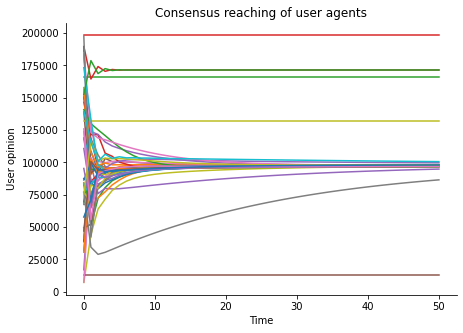

In [83]:
import pandas as pd

outputs = degroot()
outputs = np.array(outputs)
outputs = np.moveaxis(outputs,-1,0)
df = pd.DataFrame(outputs[0])
fig = plt.figure(figsize=(7,5))
for i in range(len(df)):
    plt.plot(df[i])
plt.title("Consensus reaching of user agents")
plt.xlabel("Time")
plt.ylabel("User opinion")
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.show()
df.to_csv('valuation.csv')
